In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def parse(string):
    reG = nx.MultiDiGraph()
    node = 0
    edge_labels = dict()
    n=len(string)
    or_=False
    for i, token in enumerate(string):
        next_node = node+1
        if token == "+":
            continue
        elif token ==  "*":
            continue
        elif token ==  "|":
            continue 
        else:
            if i+1<n and (string[i+1] != "+" and string[i+1] != "*") and string[i+1] == "|":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = [token]
                or_ = True
                or_node = next_node
                continue
            elif i+2<n and string[i+1] == "+"  and string[i+2] == "|":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                reG.add_edge(next_node, next_node)
                edge_labels[(next_node, next_node)] = token
                or_ = True
                or_node = node+2
            elif i+2<n and string[i+1] == "*"  and string[i+2] == "|":
                reG.add_edge(node, node)
                edge_labels[(node, node)] = token
                or_ = True
                or_node = node+1
                next_node=or_node
            if i+1<n and string[i+1] == "+" and string[i+1] != "|":
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                reG.add_edge(next_node, next_node)
                edge_labels[(next_node, next_node)] = token
                node+=1
            elif i+1<n and string[i+1] == "*" and string[i+1] != "|":
                reG.add_edge(node, node)
                edge_labels[(node, node)] = token
            elif or_:
                next_node = or_node
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)].append(token)
                or_ = False
                node+=1
            elif not or_:
                next_node = node+1
                reG.add_edge(node, next_node)
                edge_labels[(node, next_node)] = token
                node+=1
    return reG, edge_labels


def irregex(string):
    if "|" in string:
        return parse(string)
    else:
        return parse(string)


In [408]:
string = "a|bcd"

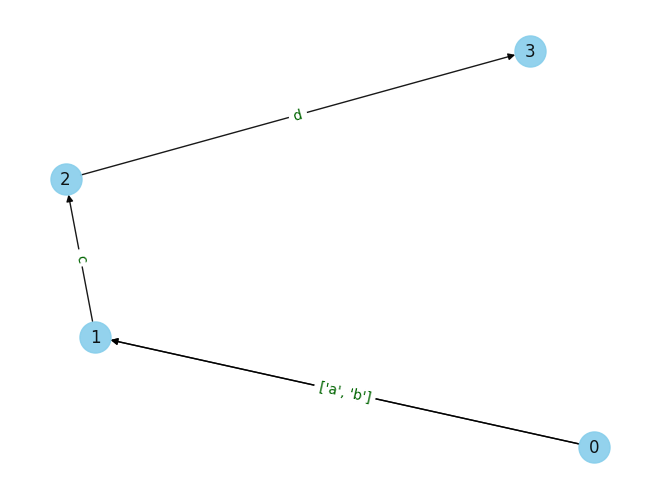

In [411]:
G, edge_labels = irregex(string)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [392]:
string = "bba*b+"

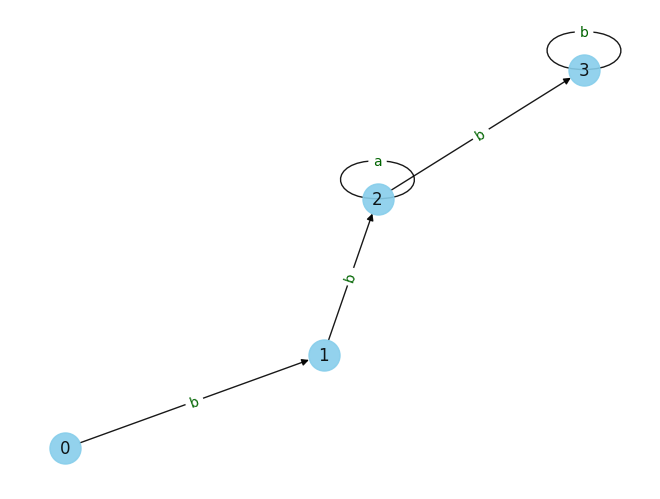

In [393]:
G, edge_labels = irregex(string)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [406]:
string = "ab*|a+"

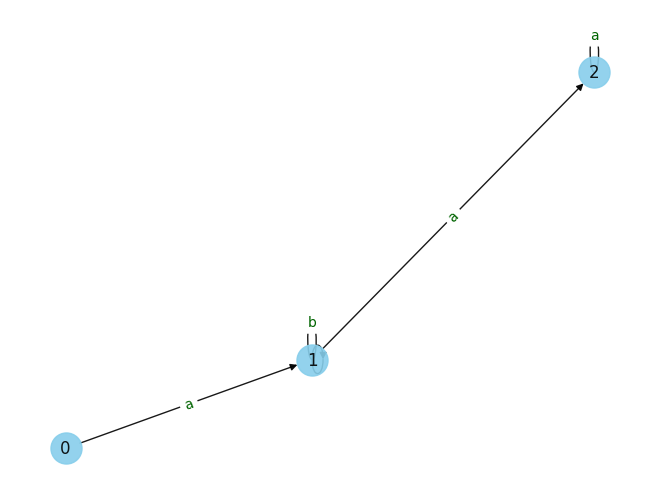

In [407]:
G, edge_labels = irregex(string)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen')

plt.axis('off')
plt.show()

In [400]:
string = "ab+|a+"

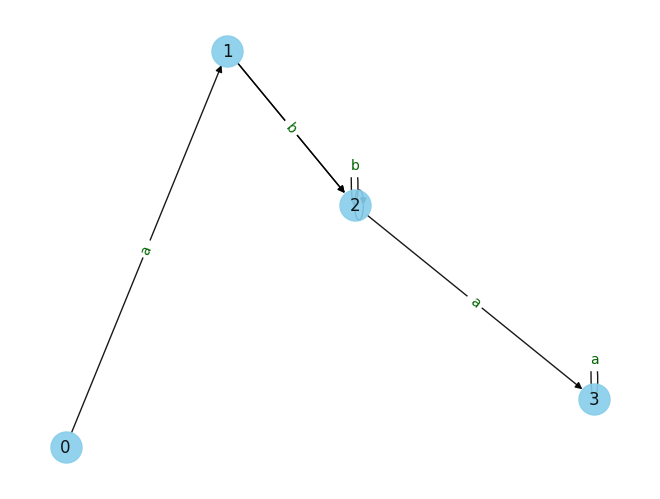

In [401]:
G, edge_labels = irregex(string)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='skyblue', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='darkgreen'
)
plt.axis('off')
plt.show()